# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Josh
[nltk_data]     Bond\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Josh
[nltk_data]     Bond\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\Josh Bond\Anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin')

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum')

In [6]:
print(f"Total articles about BTC: {btc_news['totalResults']}")

Total articles about BTC: 12303


In [7]:
print(f"Total articles about ETH: {eth_news['totalResults']}")

Total articles about ETH: 3831


In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

# Reorder DataFrame columns
cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
btc_df = btc_df[cols]
btc_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
1,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
2,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
3,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
4,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858


In [9]:
# Create the Bitcoin sentiment scores DataFrame
eth_sentiment = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

# Reorder DataFrame columns
cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
eth_df = eth_df[cols]
eth_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.156865,0.07780,0.039450,0.832800
std,0.486524,0.08629,0.080546,0.223945
min,-0.906200,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.798000
50%,0.025800,0.06650,0.000000,0.880000
75%,0.598650,0.11650,0.054500,0.962500
max,0.831600,0.24600,0.326000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.197020,0.076950,0.031150,0.89195
std,0.406770,0.067969,0.047117,0.07006
min,-0.557400,0.000000,0.000000,0.75400
25%,-0.038275,0.040500,0.000000,0.85600
50%,0.296000,0.077000,0.000000,0.91650
75%,0.449150,0.090250,0.066500,0.92750
max,0.831600,0.246000,0.145000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

    A: Bitcoin had the highest mean positive score with 0.07780, compared to Ethereum with 0.076950.

Q: Which coin had the highest compound score?

    A: Both coins had the same max compound score of 0.83160.

Q. Which coin had the highest positive score?

    A: Both coins had the same max positive score of 0.2460.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append('chars')

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and removing stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [15]:
btc_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
1,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
2,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
3,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
4,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858


In [16]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = btc_df.Text.apply(tokenizer) 
btc_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873,"[promised, earlier, year, tesla, accepts, paym..."
1,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935,"[inevitable, ha, happened, purchase, tesla, ve..."
2,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950,"[tesla, made, headline, earlier, year, took, s..."
3,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwidephoto, mi..."
4,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."


In [17]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = eth_df.Text.apply(tokenizer) 
eth_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwidephoto, mi..."
1,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[move, fast, break, thing, get, hackedthats, h..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, ha, one, handful, nft, marketplace, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
bigram_counts_btc = Counter(ngrams(tokenizer(btc_df['Text'].str.cat()), n=2))
print(dict(bigram_counts_btc))

{('promised', 'earlier'): 1, ('earlier', 'year'): 2, ('year', 'tesla'): 1, ('tesla', 'accepts'): 1, ('accepts', 'payment'): 1, ('payment', 'bitcoin'): 1, ('bitcoin', 'according'): 1, ('according', 'teslas'): 1, ('teslas', 'website'): 1, ('website', 'tweet'): 1, ('tweet', 'ceo'): 1, ('ceo', 'elon'): 1, ('elon', 'musk'): 2, ('musk', 'subsequent'): 1, ('subsequent', 'tweet'): 1, ('tweet', 'musk'): 1, ('musk', 'said'): 1, ('said', 'bitcoin'): 1, ('bitcoin', 'paid'): 1, ('paid', 'tesla'): 1, ('tesla', 'charsthe'): 1, ('charsthe', 'inevitable'): 1, ('inevitable', 'ha'): 1, ('ha', 'happened'): 1, ('happened', 'purchase'): 1, ('purchase', 'tesla'): 1, ('tesla', 'vehicle'): 1, ('vehicle', 'bitcointhis'): 1, ('bitcointhis', 'according'): 1, ('according', 'tesla'): 1, ('tesla', 'ceo'): 1, ('ceo', 'pardon'): 1, ('pardon', 'technoking'): 1, ('technoking', 'elon'): 1, ('musk', 'tweeted'): 1, ('tweeted', 'wednesdayyou'): 1, ('wednesdayyou', 'buy'): 1, ('buy', 'tesla'): 1, ('tesla', 'charstesla'): 1, 

In [20]:
# Generate the Ethereum N-grams where N=2
bigram_counts_eth = Counter(ngrams(tokenizer(eth_df['Text'].str.cat()), n=2))
print(dict(bigram_counts_eth))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'charsfamed'): 1, ('charsfamed', 'auction'): 1, ('auction', 'house'): 1, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece', 'art'): 1, ('art', 'whopping'): 1, ('whopping', 'million'): 1, ('million', 'price'): 1, ('price', 'buyer'): 1, ('buyer', 'got'): 1, ('got', 'digital'): 1, ('digital', 'file'): 1, ('file', 'collage'): 1, ('collage', 'image'): 1, ('image', 'complex'): 1, ('complex', 'legac'): 1, 

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(btc_df['Text'].str.cat()), 10)

[('bitcoin', 14),
 ('reuters', 8),
 ('ha', 6),
 ('tesla', 5),
 ('according', 5),
 ('charsby', 5),
 ('photo', 5),
 ('year', 4),
 ('charsthe', 4),
 ('exchange', 4)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth_df['Text'].str.cat()), 10)

[('new', 8),
 ('cryptocurrency', 7),
 ('reuters', 6),
 ('digital', 4),
 ('million', 4),
 ('token', 4),
 ('blockchain', 4),
 ('company', 4),
 ('bitcoin', 4),
 ('one', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

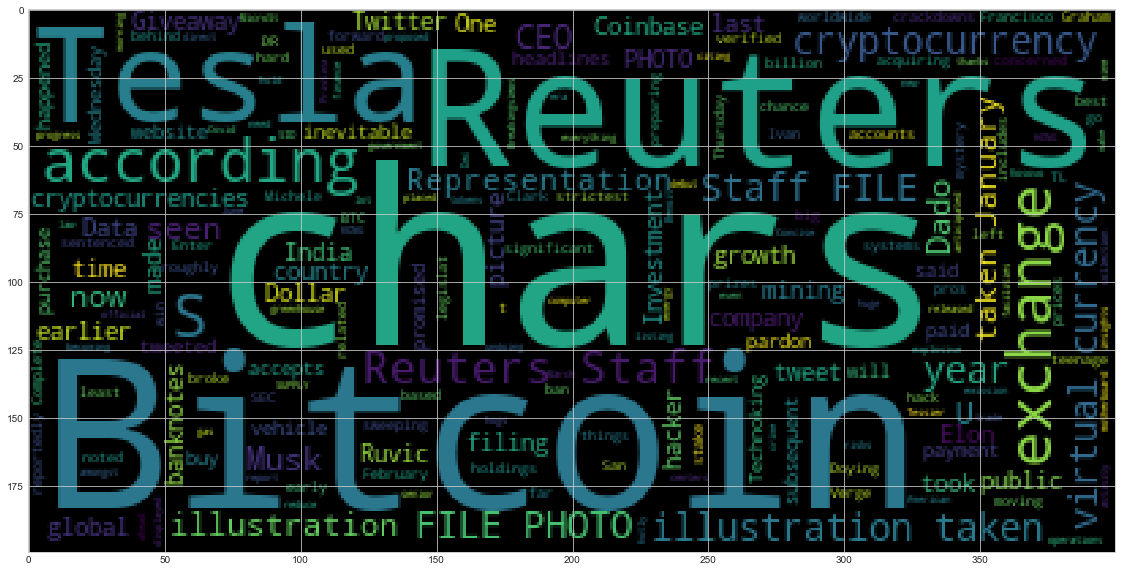

In [25]:
# Generate the Bitcoin word cloud
btc_wordcloud = WordCloud().generate(btc_df['Text'].str.cat())
plt.imshow(btc_wordcloud);

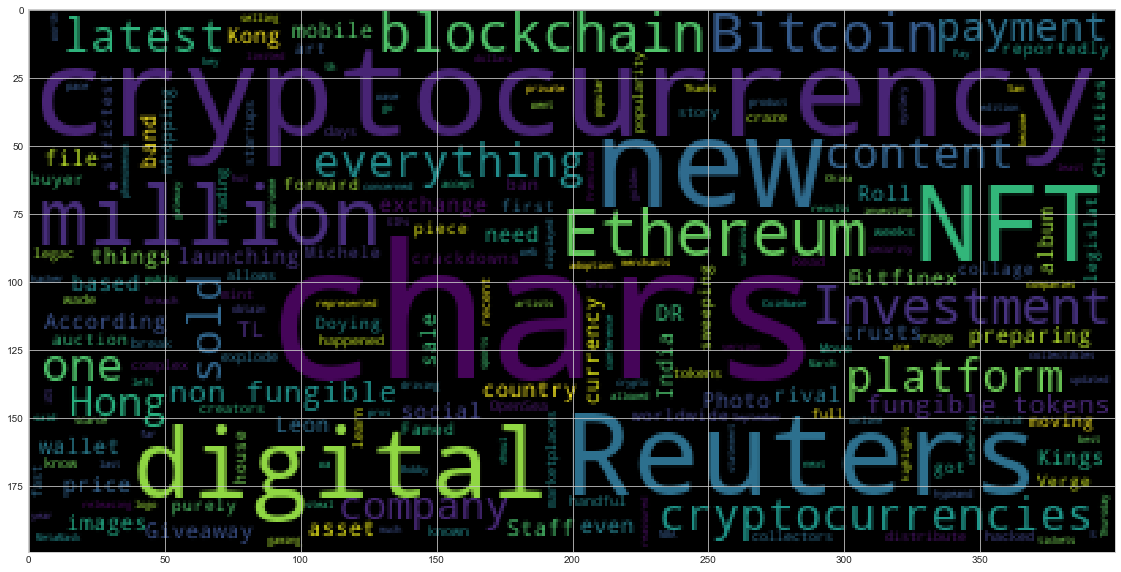

In [26]:
# Generate the Ethereum word cloud
eth_wordcloud = WordCloud().generate(eth_df['Text'].str.cat())
plt.imshow(eth_wordcloud);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df['Text'].str.cat()

In [31]:
# Run the NER processor on all of the text
btc_NER = nlp(btc_text)

# Add a title to the document
btc_NER.user_data['title']='Bitcoin NER'

In [38]:
# Render the visualization
displacy.render(btc_NER, style='ent')

In [33]:
# List all Entities
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')
            
        
show_ents(btc_NER)


earlier this year - DATE - Absolute or relative dates or periods
Tesla - ORG - Companies, agencies, institutions, etc.
Bitcoin - PERSON - People, including fictional
Tesla - ORG - Companies, agencies, institutions, etc.
Elon Musk - PERSON - People, including fictional
Musk - PERSON - People, including fictional
Tesla - ORG - Companies, agencies, institutions, etc.
Tesla - ORG - Companies, agencies, institutions, etc.
Bitcoin - PERSON - People, including fictional
Elon Musk - PERSON - People, including fictional
Wednesday - DATE - Absolute or relative dates or periods
earlier this year - DATE - Absolute or relative dates or periods
roughly $1.5 billion - MONEY - Monetary values, including unit
early February - DATE - Absolute or relative dates or periods
SEC - ORG - Companies, agencies, institutions, etc.
Photo - PERSON - People, including fictional
Michele Doying - PERSON - People, including fictional
India - GPE - Countries, cities, states
Reuters - ORG - Companies, agencies, institut

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_text = eth_df['Text'].str.cat()

In [35]:
# Run the NER processor on all of the text
eth_NER = nlp(eth_text)

# Add a title to the document
eth_NER.user_data['title']='Ethereum NER'

In [39]:
# Render the visualization
displacy.render(eth_NER, style='ent')

In [37]:
# List all Entities
show_ents(eth_NER)

One - CARDINAL - Numerals that do not fall under another type
Photo - PERSON - People, including fictional
Michele Doying - PERSON - People, including fictional
India - GPE - Countries, cities, states
Reuters - ORG - Companies, agencies, institutions, etc.
Christies - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.
$69 million - MONEY - Monetary values, including unit
5,000 - CARDINAL - Numerals that do not fall under another type
Ethereum - ORG - Companies, agencies, institutions, etc.
here.)OpenSea - GPE - Countries, cities, states
NFT - ORG - Companies, agencies, institutions, etc.
recent weeks - DATE - Absolute or relative dates or periods
these days - DATE - Absolute or relative dates or periods
Kings - PERSON - People, including fictional
NBA - ORG - Companies, agencies, institutions, etc.
millions - CARDINAL - Numerals that do not fall under another type
Ethereum - ORG - Companies, agencies, institutions, etc.
chars]MetaMask - ORG - Compan

---